In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '41e0fcde-6397-4cab-af32-426abd8b3362',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-20T13:53:33.174Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9969}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11056, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [10]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11056,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970092e+07,1.970092e+07,...,54.6846,1.408507e+12,None,2024-05-20T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970
1,1027,Ethereum,ETH,ethereum,8963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201266e+08,1.201266e+08,...,15.3728,3.713996e+11,None,2024-05-20T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970
2,825,Tether USDt,USDT,tether,85983,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.114349e+11,1.140866e+11,...,4.6159,1.141727e+11,None,2024-05-20T13:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-20 06:53:44.359970
3,1839,BNB,BNB,bnb,2163,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475862e+08,1.475862e+08,...,3.4888,8.428906e+10,None,2024-05-20T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970
4,5426,Solana,SOL,solana,661,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.489915e+08,5.763215e+08,...,3.2839,1.018418e+11,None,2024-05-20T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970
5,3408,USDC,USDC,usd-coin,19249,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.341199e+10,3.341199e+10,...,1.3829,3.341287e+10,None,2024-05-20T13:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-20 06:53:44.359970
6,52,XRP,XRP,xrp,1322,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,...,1.1736,5.129280e+10,None,2024-05-20T13:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970
7,11419,Toncoin,TON,toncoin,333,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474509e+09,5.106795e+09,...,0.9191,3.263648e+10,None,2024-05-20T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970
8,74,Dogecoin,DOGE,dogecoin,968,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.443687e+11,1.443687e+11,...,0.9065,2.190085e+10,None,2024-05-20T13:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970
9,2010,Cardano,ADA,cardano,1178,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.568011e+10,3.689771e+10,...,0.6883,2.097516e+10,None,2024-05-20T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 06:53:44.359970


In [1]:
import os
from time import sleep
import json
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

def api_runner(existing_df):
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start': '1',
      'limit': '15',
      'convert': 'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '41e0fcde-6397-4cab-af32-426abd8b3362',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return existing_df  # Return the existing DataFrame unchanged in case of error

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    # Concatenate the new data with the existing DataFrame
    updated_df = pd.concat([existing_df, df2], ignore_index=True)
    return updated_df

# Initialize an empty DataFrame to store the results
all_data = pd.DataFrame()

for i in range(333):
    all_data = api_runner(all_data)
    print('API runner completed successfully')
    sleep(60)  # sleep for one minute
exit()

# Optionally, save the collected data to a CSV file
all_data.to_csv(r'/Users/anujanaik/collected_data.csv')

API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [2]:
all_data

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11066,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970195e+07,1.970195e+07,...,53.0561,1.459200e+12,None,2024-05-22T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003
1,1027,Ethereum,ETH,ethereum,8980,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201285e+08,1.201285e+08,...,17.4455,4.496724e+11,None,2024-05-22T20:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003
2,825,Tether USDt,USDT,tether,86201,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.117556e+11,1.150866e+11,...,4.3356,1.150858e+11,None,2024-05-22T20:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-22 13:43:33.304003
3,1839,BNB,BNB,bnb,2166,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475860e+08,1.475860e+08,...,3.5073,9.040314e+10,None,2024-05-22T20:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003
4,5426,Solana,SOL,solana,661,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.491524e+08,5.764772e+08,...,3.1011,1.025928e+11,None,2024-05-22T20:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003
5,3408,USDC,USDC,usd-coin,19320,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.303164e+10,3.303164e+10,...,1.2817,3.303692e+10,None,2024-05-22T20:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-22 13:43:33.304003
6,52,XRP,XRP,xrp,1323,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,...,1.1278,5.263147e+10,None,2024-05-22T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003
7,74,Dogecoin,DOGE,dogecoin,970,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.443989e+11,1.443989e+11,...,0.9274,2.393032e+10,None,2024-05-22T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003
8,11419,Toncoin,TON,toncoin,338,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474570e+09,5.106862e+09,...,0.8860,3.356644e+10,None,2024-05-22T20:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003
9,2010,Cardano,ADA,cardano,1180,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.568314e+10,3.689771e+10,...,0.6643,2.159508e+10,None,2024-05-22T20:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-22 13:43:33.304003


In [53]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [54]:
all_data

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11056,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19701053.00000,19701053.00000,...,53.59670,1460716459229.12012,None,2024-05-20T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394
1,1027,Ethereum,ETH,ethereum,8963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120126553.22828,120126553.22828,...,16.61770,424881765510.10999,None,2024-05-20T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394
2,825,Tether USDt,USDT,tether,86005,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111434916579.78647,114086550454.37785,...,4.36040,114139646410.84000,None,2024-05-20T20:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-20 13:44:33.653394
3,1839,BNB,BNB,bnb,2163,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586224.81388,147586224.81388,...,3.40940,87171504139.00000,None,2024-05-20T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394
4,5426,Solana,SOL,solana,661,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448990053.46889,576320058.53613,...,3.25950,106877036530.34000,None,2024-05-20T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394
5,3408,USDC,USDC,usd-coin,19259,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33281643300.25960,33281643300.25960,...,1.30280,33279323853.41000,None,2024-05-20T20:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-20 13:44:33.653394
6,52,XRP,XRP,xrp,1322,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,...,1.15280,53264399166.24000,None,2024-05-20T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394
7,11419,Toncoin,TON,toncoin,335,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474517029.83656,5106803915.27940,...,0.89710,33712462941.97000,None,2024-05-20T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394
8,74,Dogecoin,DOGE,dogecoin,969,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144372026383.70523,144372026383.70523,...,0.89330,22840821918.55000,None,2024-05-20T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394
9,2010,Cardano,ADA,cardano,1178,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35680113692.01800,36897711934.96100,...,0.68350,22040234208.67000,None,2024-05-20T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-20 13:44:33.653394


In [5]:
df3 = all_data.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.266637,-0.270642,5.507232,4.507713,6.952318,33.863943
Ethereum,0.071802,0.019374,23.848627,17.231865,10.459197,24.357074
Tether USDt,-0.000205,0.009480,-0.096579,-0.050614,-0.027613,-0.002254
BNB,-0.072763,-0.108750,4.518644,2.621686,9.544210,58.568037
Solana,-0.563678,0.060567,14.257121,15.076107,2.496668,69.411866
USDC,-0.001891,-0.003157,-0.006999,0.002636,0.005411,0.010453
XRP,-0.475497,-2.656010,1.288740,-6.408431,-15.761137,-4.511435
Dogecoin,-0.115299,-0.798203,6.706174,2.714550,-1.980792,93.838723
Toncoin,-0.097724,3.384001,-6.191245,10.912105,32.358891,211.472260


In [57]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.05142
             quote.USD.percent_change_24h     5.13003
             quote.USD.percent_change_7d     10.21412
             quote.USD.percent_change_30d     7.30818
             quote.USD.percent_change_60d     6.50906
             quote.USD.percent_change_90d    33.31655
Ethereum     quote.USD.percent_change_1h      4.41039
             quote.USD.percent_change_24h    15.10513
             quote.USD.percent_change_7d     19.57838
             quote.USD.percent_change_30d    11.88576
             quote.USD.percent_change_60d     1.91674
             quote.USD.percent_change_90d    18.79256
Tether USDt  quote.USD.percent_change_1h      0.00439
             quote.USD.percent_change_24h     0.03963
             quote.USD.percent_change_7d      0.04842
             quote.USD.percent_change_30d     0.00037
             quote.USD.percent_change_60d     0.01318
             quote.USD.percent_change_90

In [58]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.05142
            quote.USD.percent_change_24h   5.13003
            quote.USD.percent_change_7d   10.21412
            quote.USD.percent_change_30d   7.30818
            quote.USD.percent_change_60d   6.50906
            quote.USD.percent_change_90d  33.31655
Ethereum    quote.USD.percent_change_1h    4.41039
            quote.USD.percent_change_24h  15.10513
            quote.USD.percent_change_7d   19.57838
            quote.USD.percent_change_30d  11.88576
            quote.USD.percent_change_60d   1.91674
            quote.USD.percent_change_90d  18.79256
Tether USDt quote.USD.percent_change_1h    0.00439
            quote.USD.percent_change_24h   0.03963
            quote.USD.percent_change_7d    0.04842
            quote.USD.percent_change_30d   0.00037
            quote.USD.percent_change_60d   0.01318
            quote.USD.percent_change_90d   0.05363
BNB         quote.USD.percent_change_1h    0.70732
            quote.USD.percent_change_24h   2.87877
            quote.USD.percent_change_7d   -0.78163
            quote.USD.percent_change_30d   2.97764
            quote.USD.percent_change_60d   6.63885
            quote.USD.percent_change_90d  66.70281
Solana      quote.USD.percent_change_1h    1.53137
            quote.USD.percent_change_24h   9.11392
            quote.USD.percent_change_7d   24.39316
            quote.USD.percent_change_30d  22.53726
            quote.USD.percent_change_60d   3.35850
            quote.USD.percent_change_90d  72.95914
USDC        quote.USD.percent_change_1h   -0.00191
            quote.USD.percent_change_24h  -0.00827
            quote.USD.percent_change_7d   -0.01387
            quote.USD.percent_change_30d  -0.01393
            quote.USD.percent_change_60d  -0.06430
            quote.USD.percent_change_90d   0.00685
XRP         quote.USD.percent_change_1h    0.57768
            quote.USD.percent_change_24h   4.73553
            quote.USD.percent_change_7d    4.89290
            quote.USD.percent_change_30d   0.77676
            quote.USD.percent_change_60d -16.52963
            quote.USD.percent_change_90d  -5.31886
Toncoin     quote.USD.percent_change_1h   -0.17159
            quote.USD.percent_change_24h   4.45720
            quote.USD.percent_change_7d   -7.64967
            quote.USD.percent_change_30d   6.45052
            quote.USD.percent_change_60d  61.45363
            quote.USD.percent_change_90d 196.14904
Dogecoin    quote.USD.percent_change_1h    1.19643
            quote.USD.percent_change_24h   6.31427
            quote.USD.percent_change_7d    4.84288
            quote.USD.percent_change_30d  -2.77317
            quote.USD.percent_change_60d   3.79490
            quote.USD.percent_change_90d  85.10977
Cardano     quote.USD.percent_change_1h    0.40927
            quote.USD.percent_change_24h   4.23809
            quote.USD.percent_change_7d   10.92987
            quote.USD.percent_change_30d  -2.93959
            quote.USD.percent_change_60d -22.81287
            quote.USD.percent_change_90d -20.26173
Avalanche   quote.USD.percent_change_1h    1.13147
            quote.USD.percent_change_24h   8.20761
            quote.USD.percent_change_7d   17.72497
            quote.USD.percent_change_30d   1.91919
            quote.USD.percent_change_60d -28.36536
            quote.USD.percent_change_90d   1.10100
Shiba Inu   quote.USD.percent_change_1h   -0.11412
            quote.USD.percent_change_24h   4.61989
            quote.USD.percent_change_7d    5.96094
            quote.USD.percent_change_30d  -2.49467
            quote.USD.percent_change_60d  -7.89580
            quote.USD.percent_change_90d 156.23595
TRON        quote.USD.percent_change_1h    0.02164
            quote.USD.percent_change_24h   1.37192
            quote.USD.percent_change_7d   -2.54818
            quote.USD.percent_change_30d  10.85639
            quote.USD.percent_change_60d   1.72858
            quo

In [60]:
index = pd.Index(range(90))
# Set the above DataFrame index object as the index
#using set_index() function

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05142
1,Bitcoin,quote.USD.percent_change_24h,5.13003
2,Bitcoin,quote.USD.percent_change_7d,10.21412
3,Bitcoin,quote.USD.percent_change_30d,7.30818
4,Bitcoin,quote.USD.percent_change_60d,6.50906
5,Bitcoin,quote.USD.percent_change_90d,33.31655
6,Ethereum,quote.USD.percent_change_1h,4.41039
7,Ethereum,quote.USD.percent_change_24h,15.10513
8,Ethereum,quote.USD.percent_change_7d,19.57838
9,Ethereum,quote.USD.percent_change_30d,11.88576


In [64]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05142
1,Bitcoin,24h,5.13003
2,Bitcoin,7d,10.21412
3,Bitcoin,30d,7.30818
4,Bitcoin,60d,6.50906
5,Bitcoin,90d,33.31655
6,Ethereum,quote.USD.percent_change_1h,4.41039
7,Ethereum,24h,15.10513
8,Ethereum,7d,19.57838
9,Ethereum,30d,11.88576


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/anujanaik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


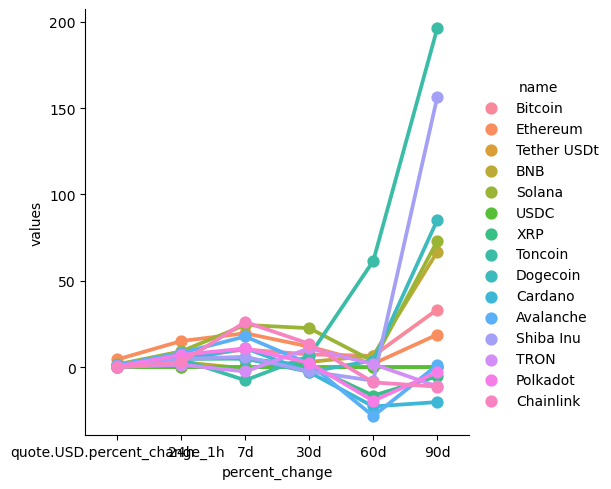

In [65]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [67]:
# Now to do something much simpler
#we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,67071.78499,2024-05-20 06:53:44.359970
